# Import solution

In [1]:
solution = {'route': [['H1', 'A1', 'A4', 'C4', 'C8', 'A8'], ['H1', 'C9', 'A11', 'C11', 'B10', 'C7'], ['H1', 'G6', 'C6', 'D6', 'B6', 'A6'], ['H1', 'E7', 'H7', 'G7', 'F8', 'G8', 'H8'], ['H1', 'H4', 'G4', 'E4', 'E6', 'H6']], 'total_time': [134.0, 135.0, 132.0, 133.0, 117.0], 'travel_time': [70.0, 77.0, 48.0, 55.0, 63.0], 'service_time': [64, 58, 84, 78, 54], 'n_requests_finished': [32, 29, 42, 39, 27], 'obj_value': 1350.2, 'comp_time': 476}

In [2]:
solution

{'route': [['H1', 'A1', 'A4', 'C4', 'C8', 'A8'],
  ['H1', 'C9', 'A11', 'C11', 'B10', 'C7'],
  ['H1', 'G6', 'C6', 'D6', 'B6', 'A6'],
  ['H1', 'E7', 'H7', 'G7', 'F8', 'G8', 'H8'],
  ['H1', 'H4', 'G4', 'E4', 'E6', 'H6']],
 'total_time': [134.0, 135.0, 132.0, 133.0, 117.0],
 'travel_time': [70.0, 77.0, 48.0, 55.0, 63.0],
 'service_time': [64, 58, 84, 78, 54],
 'n_requests_finished': [32, 29, 42, 39, 27],
 'obj_value': 1350.2,
 'comp_time': 476}

In [3]:
# get requests
import pandas as pd

requests = pd.read_csv('sub20230114_agg.csv', index_col = 0)
requests['time'] = requests['Number of Scans'] * 2
requests = requests.rename(columns = {"Number of Scans": "requests"})
requests

,requests,time
Ward,,
A1,3,6
A10,5,10
A11,1,2
A3,5,10
A4,5,10
A5,8,16
A6,14,28
A7,5,10
A8,6,12


# Bar chart

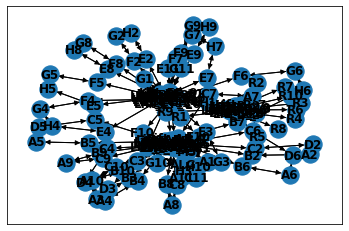

In [4]:
# import from DistanceMatrix
from ipynb.fs.full.DistanceMatrix_v2 import *

In [5]:
total_requests = [241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241, 241]
fulfilled = []

time = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

total_fulfilled = 0

for t in time:
    count = 0
    for team in solution['route']:
        total_time = 0
        for i in range(1, len(team)):
            total_time += get_shortest_path_length(graph, team[i-1], team[i]) # travel time
            total_time += requests.loc[team[i], 'time']# service time
            if total_time <= t:
                count += requests.loc[team[i], 'requests']
            else:
                break
    fulfilled.append(count)

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib qt5

# Sample data for number of requests over time
# requests = [50, 50, 50, 50, 50]
# fulfilled = [5, 10, 15, 20, 25]
# time = [1, 2, 3, 4, 5]

# Create the figure and axes for the bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Time in Minutes')
ax.set_ylabel('Total Number of Requests')
ax.set_title('Number of Requests Fulfilled Over Time')

# Define the update function for the bar chart
def update(frame):
    ax.clear()
    ax.bar(time[:frame+1], total_requests[:frame+1], width = 3, color = 'white', 
           edgecolor = 'black', label = 'Outstanding Requests')
    ax.bar(time[:frame+1], fulfilled[:frame+1], width = 3, color = 'blue', 
           label = 'Requests Fulfilled')
    ax.set_xlabel('Time in Minutes')
    ax.set_ylabel('Total Number of Requests')
    ax.set_title('Number of Requests Fulfilled Over Time')
    ax.legend()

# Create the animation for the bar chart
ani = FuncAnimation(fig, update, frames = len(time), interval = 1000, repeat = True)
# Save the bar chart as gif
ani.save('tabu_search_visualization.gif')

plt.show()

# Alternative

In [7]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Sample data for number of requests over time
# # requests = [10, 20, 30, 40, 50]
# # time = [1, 2, 3, 4, 5]

# # Sample data for number of requests fulfilled over time
# # fulfilled = [5, 10, 15, 20, 25]

# # Create the figure and axes for the first bar chart
# fig1, ax1 = plt.subplots()
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Number of Requests')
# ax1.set_title('Number of Requests Over Time')

# # Create the figure and axes for the second bar chart
# fig2, ax2 = plt.subplots()
# ax2.set_xlabel('Time')
# ax2.set_ylabel('Number of Requests Fulfilled')
# ax2.set_title('Number of Requests Fulfilled Over Time')

# # Define the update function for the first bar chart
# def update1(frame):
#     ax1.clear()
#     ax1.bar(time[:frame+1], requests[:frame+1], width = 3)
#     ax1.set_xlabel('Time')
#     ax1.set_ylabel('Number of Requests')
#     ax1.set_title('Number of Requests Over Time')

# # Define the update function for the second bar chart
# def update2(frame):
#     ax2.clear()
#     ax2.bar(time[:frame+1], fulfilled[:frame+1], width = 3)
#     ax2.set_xlabel('Time')
#     ax2.set_ylabel('Number of Requests Fulfilled')
#     ax2.set_title('Number of Requests Fulfilled Over Time')

# # Create the animation for the first bar chart
# ani1 = FuncAnimation(fig1, update1, frames = len(time), interval = 1000, repeat = True)

# # Create the animation for the second bar chart
# ani2 = FuncAnimation(fig2, update2, frames = len(time), interval = 1000, repeat = True)

# plt.show()

In [8]:
# # Sample data for number of outstanding requests over time
# outstanding = [50, 20, 30, 10, 20, 40, 60, 20, 40, 10, 40, 60, 20, 10]
# time = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

# # Create the figure and axes for the bar chart
# fig, ax = plt.subplots()
# ax.set_xlabel('Time')
# ax.set_ylabel('Number of Outstanding Requests')
# ax.set_title('Number of Outstanding Requests Over Time')

# # Define the update function for the bar chart
# def update(frame):
#     ax.clear()
#     ax.bar(time[:frame+1], outstanding[:frame+1], width = 3)
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Number of Outstanding Requests')
#     ax.set_title('Number of Outstanding Requests Over Time')

# # Create the animation for the bar chart
# ani = FuncAnimation(fig, update, frames = len(time), interval = 1000, repeat = True)

# plt.show()

2023-05-18 01:55:33.089 python[1946:47382] _TIPropertyValueIsValid called with 4 on nil context!
2023-05-18 01:55:33.089 python[1946:47382] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2023-05-18 01:55:33.089 python[1946:47382] Text input context does not respond to _valueForTIProperty:
2023-05-18 01:55:33.090 python[1946:47382] _TIPropertyValueIsValid called with 4 on nil context!
2023-05-18 01:55:33.090 python[1946:47382] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2023-05-18 01:55:33.090 python[1946:47382] Text input context does not respond to _valueForTIProperty:
2023-05-18 01:55:33.093 python[1946:47382] _TIPropertyValueIsValid called with 4 on nil context!
2023-05-18 01:55:33.093 python[1946:47382] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2023-05-18 01:55:33.093 python[1946:47382] Text input context does not respond to _valueForTIProperty:
2023-05-18 01